<a href="https://colab.research.google.com/github/samer-glitch/-Case-Study-Model-Engineering-DLMDSME01-/blob/main/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving PSP_Jan_Feb_2019.csv to PSP_Jan_Feb_2019.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving psp_fees.csv to psp_fees.csv


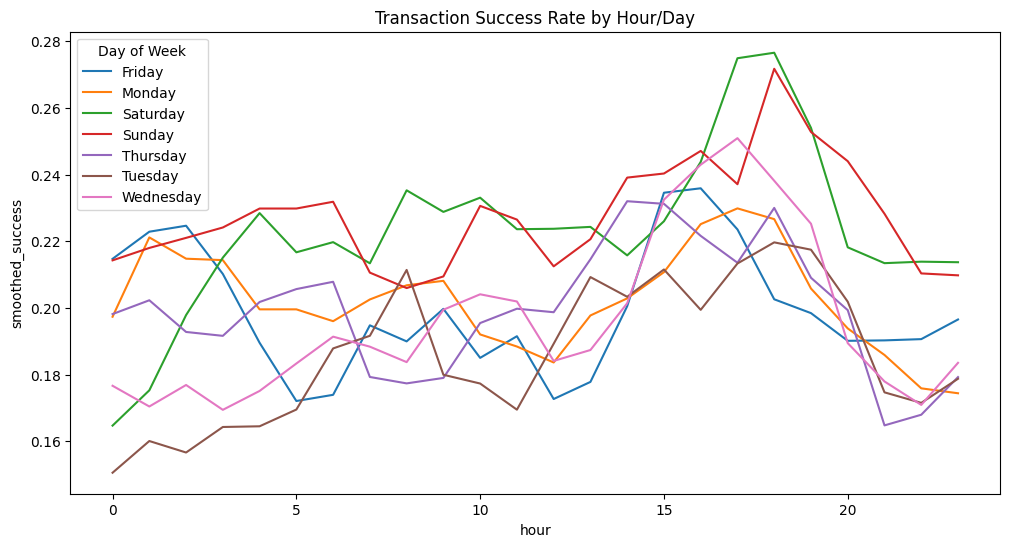

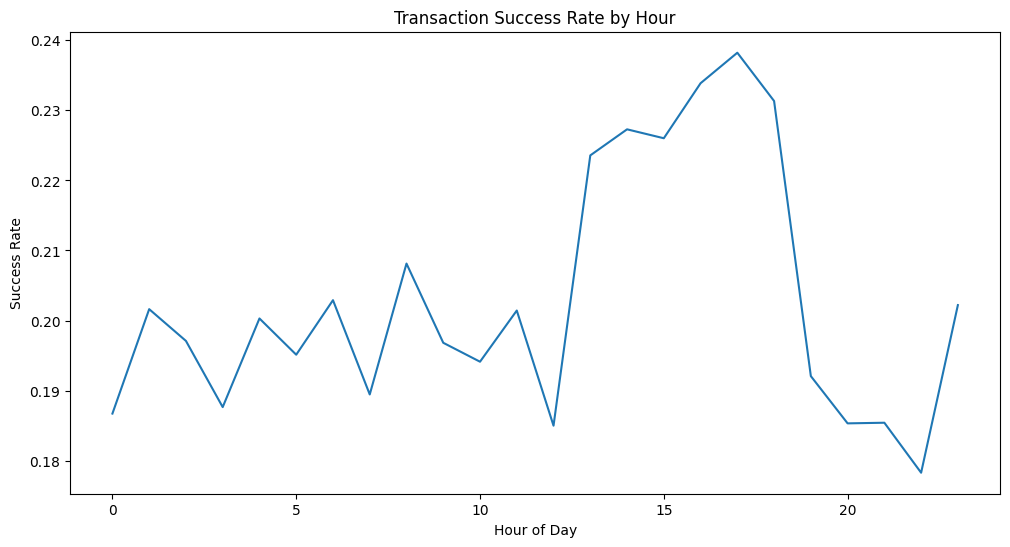

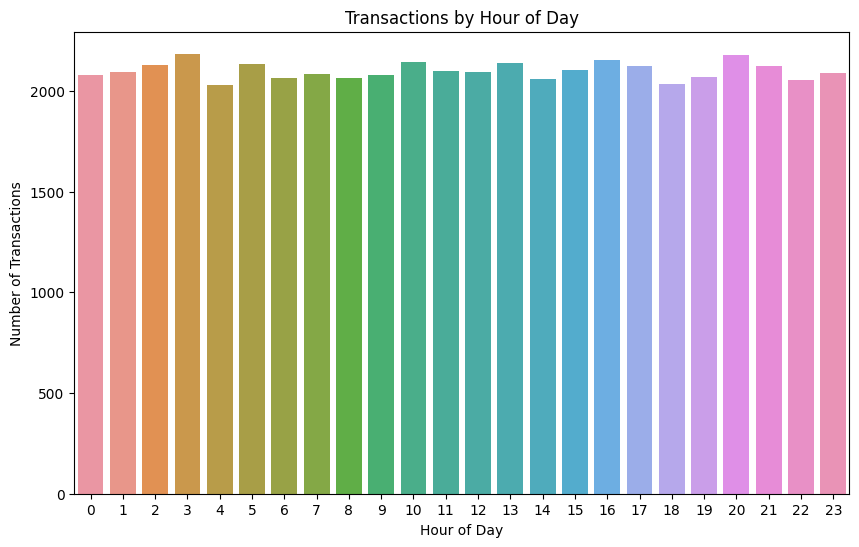

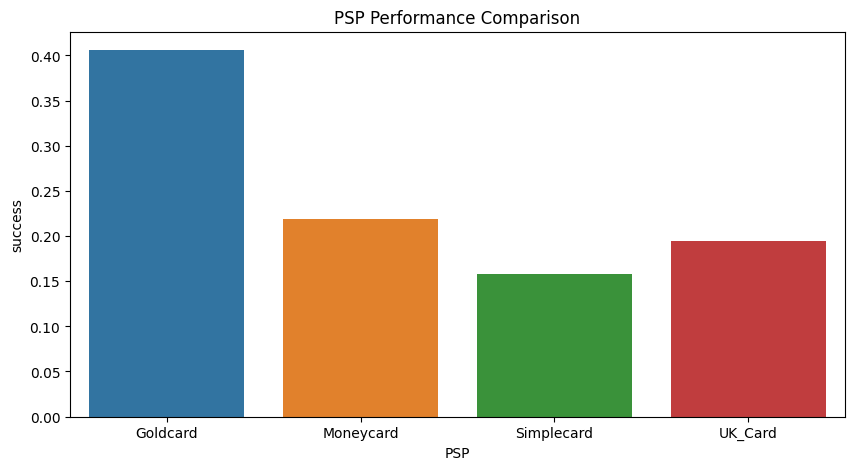

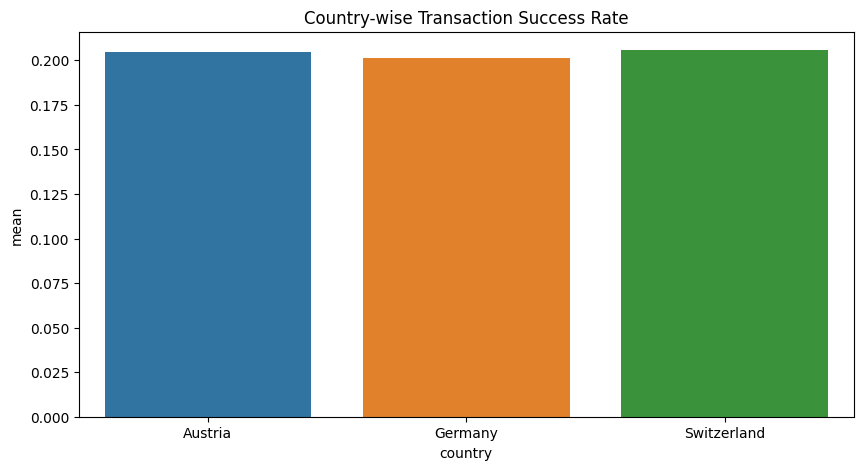

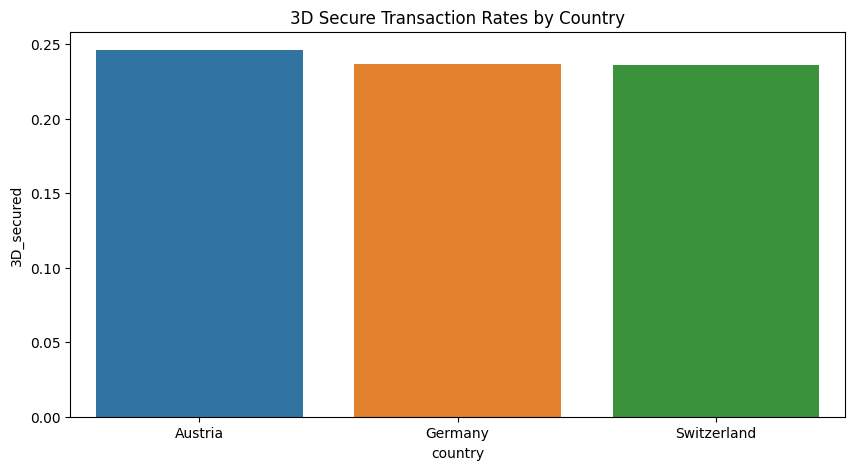

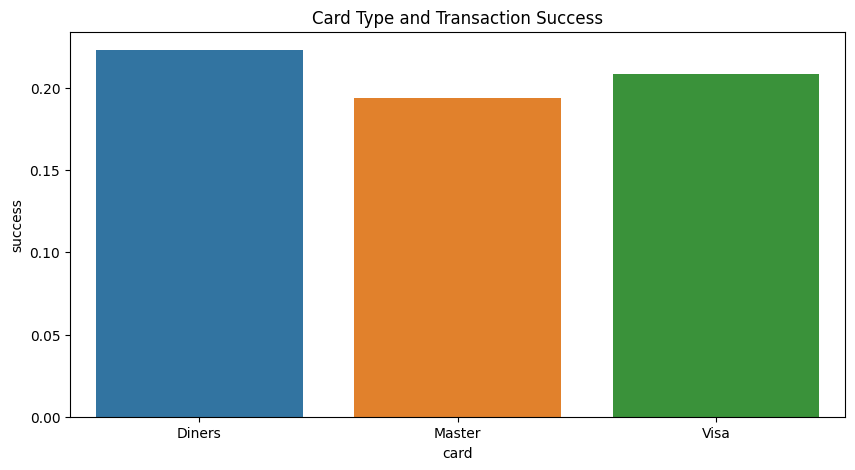

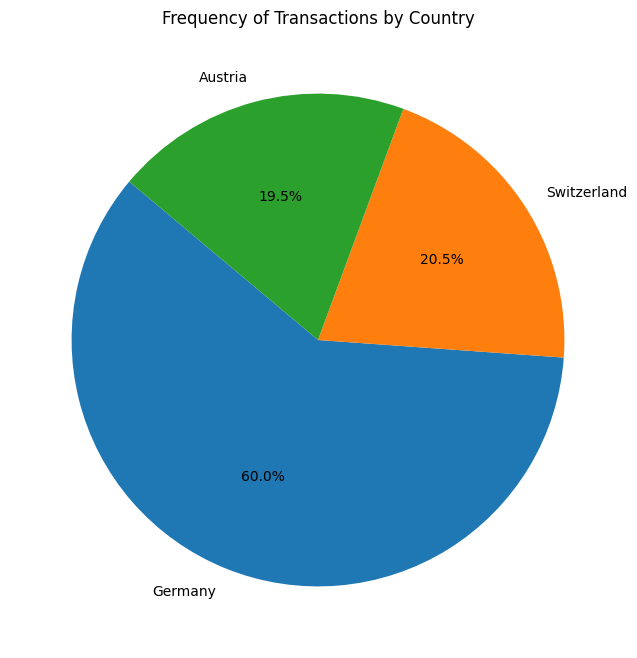

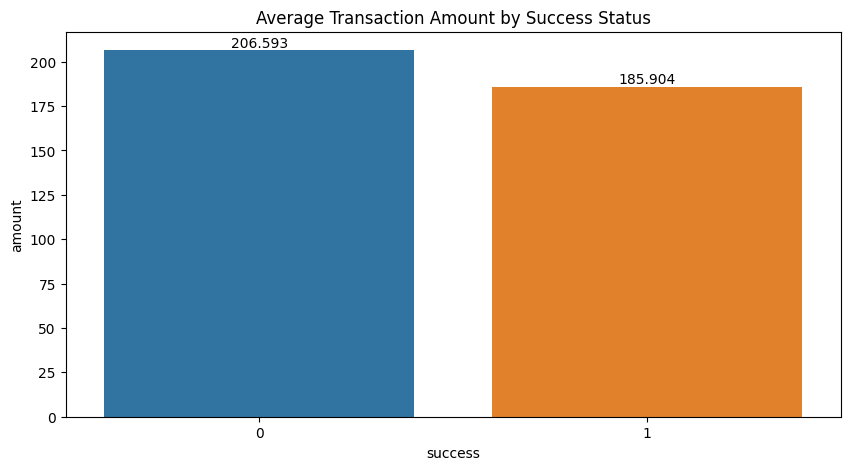

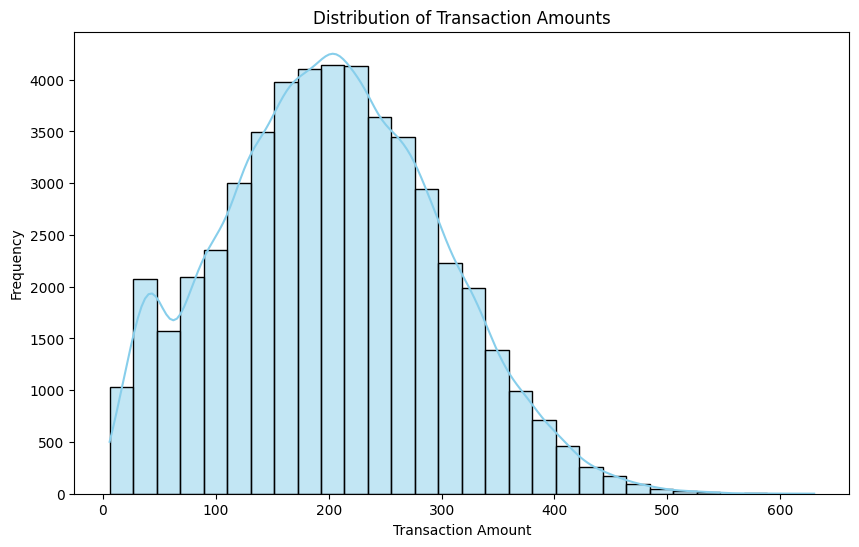

,count,mean,std,min,25%,50%,75%,max
amount,50410.0,202.395715,96.27473,6.0,133.0,201.0,269.0,630.0


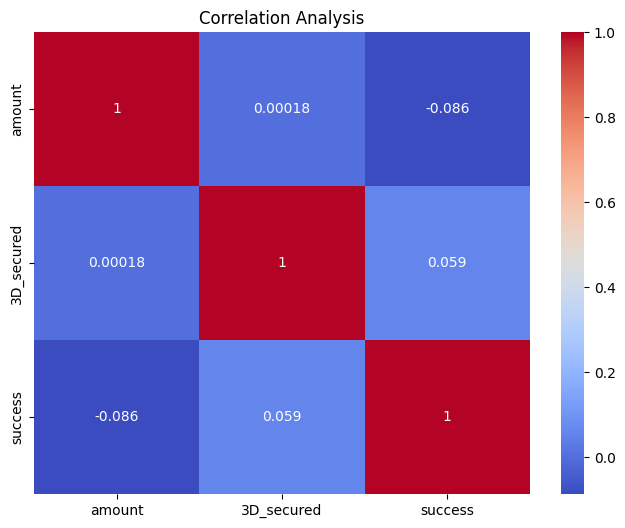

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the dataset
transactions = pd.read_csv('PSP_Jan_Feb_2019.csv')
transactions['tmsp'] = pd.to_datetime(transactions['tmsp'])
transactions['hour'] = transactions['tmsp'].dt.hour
transactions['day'] = transactions['tmsp'].dt.day_name()

# 1. Transaction Success Rate by Hour/Day
success_rate_by_hour_day = transactions.groupby(['day', 'hour'])['success'].mean().reset_index()

plt.figure(figsize=(12, 6))
for day in success_rate_by_hour_day['day'].unique():
    # Create a copy to avoid SettingWithCopyWarning
    day_data = success_rate_by_hour_day[success_rate_by_hour_day['day'] == day].copy()
    # Apply a rolling mean for smoothing
    day_data['smoothed_success'] = day_data['success'].rolling(window=3, min_periods=1).mean()
    sns.lineplot(x=day_data['hour'], y=day_data['smoothed_success'], label=day)

plt.title('Transaction Success Rate by Hour/Day')
plt.legend(title='Day of Week')
plt.show()



# Creating a new DataFrame for engineered features
feature_df = pd.DataFrame()

# Adding time-related features to the new DataFrame
feature_df['hour_of_day'] = transactions['tmsp'].dt.hour
feature_df['day_of_week'] = transactions['tmsp'].dt.dayofweek
feature_df['minute_of_hour'] = transactions['tmsp'].dt.minute
hourly_success_rate = transactions.groupby('hour')['success'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_success_rate)
plt.title('Transaction Success Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Success Rate')
plt.show()


hourly_success_rate = transactions.groupby('hour')['success'].mean()
plt.figure(figsize=(10, 6))
sns.countplot(x='hour_of_day', data=feature_df)
plt.title("Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()



# 2. PSP Performance Comparison
psp_performance = transactions.groupby('PSP')['success'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=psp_performance, x='PSP', y='success')
plt.title('PSP Performance Comparison')
plt.show()

# 3. Country-wise Transaction Analysis
country_analysis = transactions.groupby('country')['success'].agg(['count', 'mean']).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=country_analysis, x='country', y='mean')
plt.title('Country-wise Transaction Success Rate')
plt.show()

# 4. Most Secure 3D Country
secure_3d_by_country = transactions.groupby('country')['3D_secured'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=secure_3d_by_country, x='country', y='3D_secured')
plt.title('3D Secure Transaction Rates by Country')
plt.show()

# 5. Card Type and Transaction Success
card_type_success = transactions.groupby('card')['success'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=card_type_success, x='card', y='success')
plt.title('Card Type and Transaction Success')
plt.show()

# 6. Frequency of Transactions by Country (Pie Chart)
frequency_by_country = transactions['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'frequency'})

plt.figure(figsize=(8, 8))
plt.pie(frequency_by_country['frequency'], labels=frequency_by_country['country'], autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Transactions by Country')
plt.show()


# 7. Average Transaction Amount by Success Status
average_amount_by_success = transactions.groupby('success')['amount'].mean().reset_index()

plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=average_amount_by_success, x='success', y='amount')
plt.title('Average Transaction Amount by Success Status')

# Annotating the specific average amounts
barplot.bar_label(barplot.containers[0])

plt.show()


# 8. Transaction Amounts Analysis
plt.figure(figsize=(10, 6))
sns.histplot(transactions['amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()
# Analyzing the 'amount' feature
# Descriptive statistics for the 'amount' feature
amount_distribution = transactions['amount'].describe()

from IPython.display import display

# Convert the Series to DataFrame for a tabular view
amount_distribution_table = pd.DataFrame(amount_distribution).transpose()

# Display the table with IPython's display function
display(amount_distribution_table)


# 9. Correlation Analysis
print(" \n")
correlation_analysis = transactions[['amount', '3D_secured', 'success']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_analysis, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()